# Voronoi


In [3]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np


def obs_gen(c,r):
    ob_list=[]
    theta=np.arange(0,6.29,0.1)
    for angle in theta:
        ob_list.append([c[0]+r*np.cos(angle),c[1]+r*np.sin(angle)])
    return ob_list 
b=np.arange(-4,4,0.1)


b_=np.arange(-4,4,0.1)


wall1=[]
wall2=[]
wall3=[]
wall4=[]
wall1_=[]
wall2_=[]
wall3_=[]
wall4_=[]
for i in b:
    wall1.append([i,4])
    wall2.append([i,-4])
    wall3.append([4,i])
    wall4.append([-4,i])
for i in b_:
    wall1_.append([i,4])
    wall2_.append([i,-4])
    wall3_.append([4,i])
    wall4_.append([-4,i])

ob1=obs_gen([0,2],0.5)
ob3=obs_gen([0,-2],0.5)
ob2=obs_gen([1.5,0],0.7)
ob4=obs_gen([-1.5,0],0.5)


In [4]:
def dist_pos(p1,p2):
    vd=p1-p2
    return np.sqrt(vd[0]**2+vd[1]**2)

def to_del(arr):
    ind=[]
    for i,point in enumerate(arr):
        if dist_pos(point,[-1.5,0]) < 0.3:
            if not i in ind:
                ind.append(i)
        if dist_pos(point,[1.5,0]) < 0.3:
            if not i in ind:
                ind.append(i)
        if dist_pos(point,[0,2]) < 0.3:
            if not i in ind:
                ind.append(i)
        if dist_pos(point,[0,-2]) < 0.3:
            if not i in ind:
                ind.append(i)
        if dist_pos(point,[0,0]) > 6:
            if not i in ind:
                ind.append(i)
    return ind
def to_del2(ridges):
    ind=[]
    for i,pair in enumerate(ridges):
        if (pair[0]==-1) or (pair[1]==-1):
            if not i in ind:
                ind.append(i)
        if (pair[0]==426) or (pair[1]==426):
            if not i in ind:
                ind.append(i)
        if (pair[0]==446) or (pair[1]==446):
            if not i in ind:
                ind.append(i)
        if (pair[0]==496) or (pair[1]==496):
            if not i in ind:
                ind.append(i)
        if (pair[0]==514) or (pair[1]==514):
            if not i in ind:
                ind.append(i)

    return ind





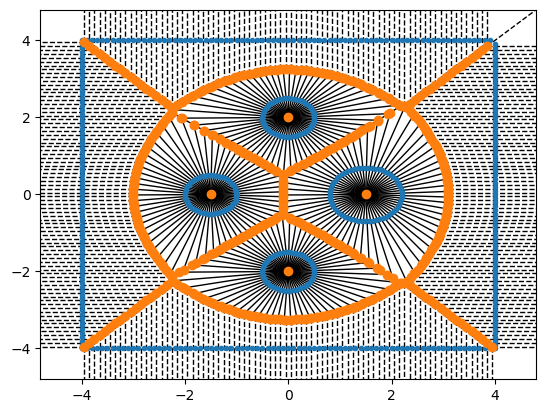

array([[245, 363],
       [363, 425],
       [422, 423],
       ...,
       [511, 512],
       [ 82, 513],
       [505, 512]])

In [5]:
vor = Voronoi(np.array([*(ob1),*(ob2),*(ob3),*(ob4),*(wall1),*(wall2),*(wall3),*(wall4)]))
vertices_=np.delete(vor.vertices,to_del(vor.vertices),0)
ridges=np.delete(vor.ridge_vertices,to_del2(vor.ridge_vertices),0)
fig = voronoi_plot_2d(vor,s=1)
plt.show()
ridges


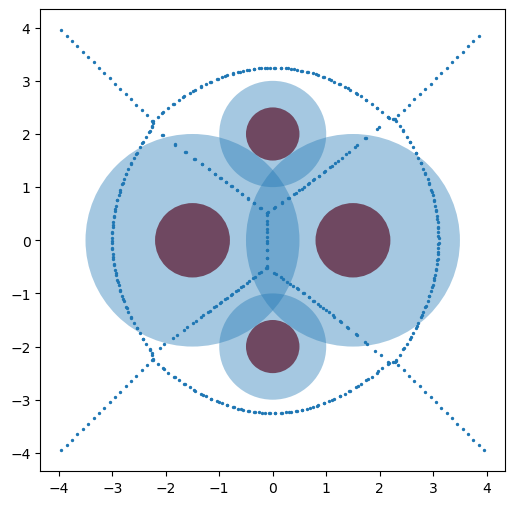

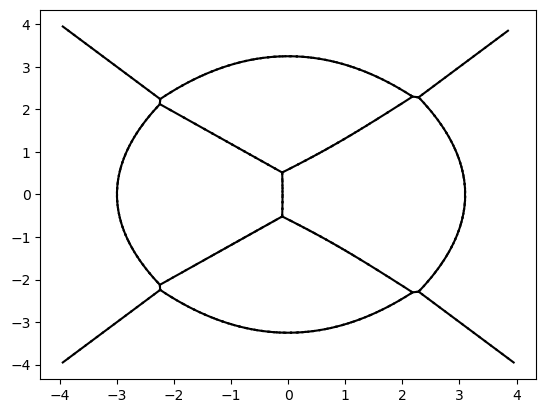

In [6]:
x_data=[]
y_data=[]
obs1=plt.Circle((0,2),0.5,fc='brown')
obs1_=plt.Circle((0,2),1,alpha=0.4)
obs2=plt.Circle((1.5,0),0.7,fc='brown')
obs2_=plt.Circle((1.5,0),2,alpha=0.4)
obs3=plt.Circle((0,-2),0.5,fc='brown')
obs3_=plt.Circle((0,-2),1,alpha=0.4)
obs4=plt.Circle((-1.5,0),0.7,fc='brown')
obs4_=plt.Circle((-1.5,0),2,alpha=0.4)
fig=plt.figure(figsize=(6,6))

plt.gca().add_patch(obs1)
plt.gca().add_patch(obs1_)
plt.gca().add_patch(obs2)
plt.gca().add_patch(obs2_)
plt.gca().add_patch(obs3)
plt.gca().add_patch(obs3_)
plt.gca().add_patch(obs4)
plt.gca().add_patch(obs4_)
vertices_=np.delete(vor.vertices,to_del(vor.vertices),0)
for i,tuple_ in enumerate(vertices_):
    # to many data points taking every seventh data
    if i%1==0:
     x_data.append(tuple_[0])
     y_data.append(tuple_[1])


plt.scatter(x_data,y_data,s=2)
fig2=plt.figure()
edges=[[-0.7854439996780953, -1.027127371001201]]
for pair in ridges:
    x=[vor.vertices[pair[0]][0],vor.vertices[pair[1]][0]]
    y=[vor.vertices[pair[0]][1],vor.vertices[pair[1]][1]]
    edges.append([x[1],y[1]])
    plt.plot(x,y,'k')



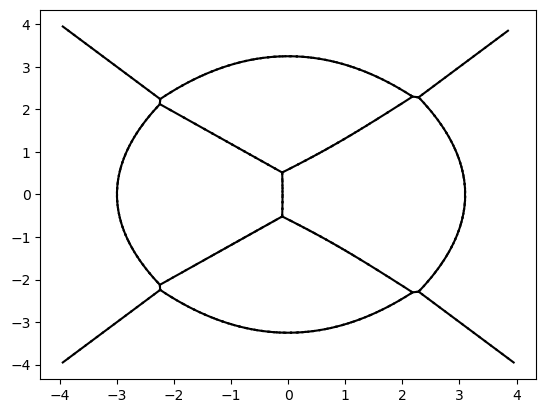

In [7]:

edges_=[]
for i,pair in enumerate(ridges):
    x=[vor.vertices[pair[0]][0],vor.vertices[pair[1]][0]]
    y=[vor.vertices[pair[0]][1],vor.vertices[pair[1]][1]]
    edges_.append([np.array([x[0],y[0]]),np.array([x[1],y[1]])])
    plt.plot(x,y,'k')
edges_=np.array(edges_)
vertices_=np.array(vertices_)

In [8]:
dict_={}
for v in vertices_:
    vert_dict={}
    for e in edges_:
        d=dist_pos((e[0]),(e[1]))
        if  np.array_equal(e[0],v):
            vert_dict[str(e[1][0])+','+str(e[1][1])]=d
        elif np.array_equal(e[1],v):
            vert_dict[str(e[0][0])+','+str(e[0][1])]=d
    dict_[str(v[0])+','+str(v[1])]=vert_dict


In [9]:

goal=np.array([0,3.5])
start=np.array([0,0])
closest_goal=10000
closest_start=10000
gd =[]
sd=[]

for vertex in vertices_:
    if(dist_pos(vertex,start)< closest_start):
        sd=vertex
        closest_start=dist_pos(vertex,start)
    if(dist_pos(vertex,goal)< closest_goal):
        gd=vertex
        closest_goal=dist_pos(vertex,goal)

sd,gd


(array([-0.0992447 , -0.01344572]), array([0.0259902 , 3.24956943]))

In [10]:
import heapq
import sys

class Graph:
    
    def __init__(self):
        self.vertices = {}
        
    def add_vertex(self, name, edges):
        self.vertices[name] = edges
    
    def shortest_path(self, start, finish):
        distances = {} # Distance from start to node
        previous = {}  # Previous node in optimal path from source
        nodes = [] # Priority queue of all nodes in Graph

        for vertex in self.vertices:
            if vertex == start: # Set root node as distance of 0
                distances[vertex] = 0
                heapq.heappush(nodes, [0, vertex])
            else:
                distances[vertex] = sys.maxsize
                heapq.heappush(nodes, [sys.maxsize, vertex])
            previous[vertex] = None
        
        while nodes:
            smallest = heapq.heappop(nodes)[1] # Vertex in nodes with smallest distance in distances
            if smallest == finish: # If the closest node is our target we're done so print the path
                path = []
                while previous[smallest]: # Traverse through nodes til we reach the root which is 0
                    path.append(smallest)
                    smallest = previous[smallest]
                return path
            if distances[smallest] == sys.maxsize: # All remaining vertices are inaccessible from source
                break
            
            for neighbor in self.vertices[smallest]: # Look at all the nodes that this vertex is attached to
                alt = distances[smallest] + self.vertices[smallest][neighbor] # Alternative path distance
                if alt < distances[neighbor]: # If there is a new shortest path update our priority queue (relax)
                    distances[neighbor] = alt
                    previous[neighbor] = smallest
                    for n in nodes:
                        if n[1] == neighbor:
                            n[0] = alt
                            break
                    heapq.heapify(nodes)
        return distances
        
    def __str__(self):
        return str(self.vertices)

if __name__ == '__main__':
    g = Graph()
    for v,adj in dict_.items():
        g.add_vertex(v,adj)
    
    
    path=g.shortest_path(str(sd[0])+','+str(sd[1]), str(gd[0])+','+str(gd[1]))
  


In [11]:
co_ordinate=[goal]
path.append(str(sd[0])+','+str(sd[1]))
for i,node in enumerate(path):
    if i%20==0:
        a=node.split(',')
        co_ordinate.append([float(a[0]),float(a[1])])
co_ordinate.append(start)
print(path)


['0.025990201108921245,3.249569428646434', '0.05000000000000306,3.2501350849829205', '0.15000000000000366,3.245829919870603', '0.15121182358372456,3.245697028027798', '0.250000000000004,3.2381587472119913', '0.2770458265648633,3.2343005949078116', '0.3500000000000035,3.226311853609555', '0.40430635391723946,3.2167881416993933', '0.4500000000000045,3.210269978516042', '0.5338321783763624,3.1928463737293864', '0.5500000000000032,3.190004704481407', '0.6500000000000049,3.1659952588533704', '0.6660373155093727,3.161113049147584', '0.7500000000000044,3.138259839345638', '0.8016025218758658,3.120947010120318', '0.850000000000003,3.1062263316966323', '0.9421420955975376,3.0724711679282777', '0.9500000000000042,3.06983013422316', '1.0500000000000047,3.0301275857061025', '1.087387183580749,3.0130060508123773', '1.150000000000003,2.986228606900573', '1.2397765347295828,2.9424835756441325', '1.2500000000000044,2.9377974471905826', '1.350000000000004,2.8861386497773136', '1.3992011586097877,2.8578

Circle(xy=(0, 2), radius=0.5)


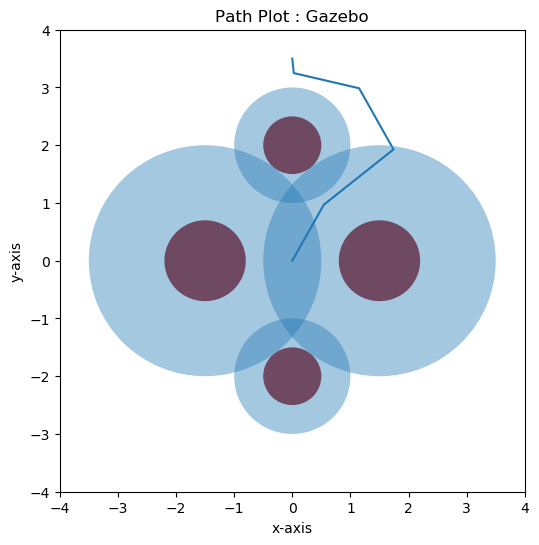

In [12]:
x_data2=[]
y_data2=[]
for i,tuple_ in enumerate(co_ordinate):
    x_data2.append(tuple_[0])
    y_data2.append(tuple_[1])
# rectangle= plt.Rectangle((0.4,0.4),1.1,1.1,fc='brown')
obs1=plt.Circle((0,2),0.5,fc='brown')
obs1_=plt.Circle((0,2),1,alpha=0.4)
obs2=plt.Circle((1.5,0),0.7,fc='brown')
obs2_=plt.Circle((1.5,0),2,alpha=0.4)
obs3=plt.Circle((0,-2),0.5,fc='brown')
obs3_=plt.Circle((0,-2),1,alpha=0.4)
obs4=plt.Circle((-1.5,0),0.7,fc='brown')
obs4_=plt.Circle((-1.5,0),2,alpha=0.4)
fig=plt.figure(figsize=(6,6))

plt.gca().add_patch(obs1)
plt.gca().add_patch(obs1_)
plt.gca().add_patch(obs2)
plt.gca().add_patch(obs2_)
plt.gca().add_patch(obs3)
plt.gca().add_patch(obs3_)
plt.gca().add_patch(obs4)
plt.gca().add_patch(obs4_)
plt.xlim((-4,4))
plt.ylim((-4,4))
plt.plot(x_data2,y_data2)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Path Plot : Gazebo')
print(obs1)